<a href="https://colab.research.google.com/github/Nguthirukar/Nguthirukar/blob/main/Linear_Regression_Algorithm_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating a Prediction Model

## LOADING THE DATASET


### *   Importing the necessary libraries.
### *   loading the dataset and viewing it.





In [1]:
import numpy as np
import pandas as pd


In [3]:
df = pd.read_csv("/content/drive/MyDrive/bike data.csv")

In [4]:
df.head()

,Date,year,Customer ID,Customer Age,Age Group,Customer Gender,Country,State,Product Category,Sub Category,Product,Frame Size,Order Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit
0,11/26/2013,2013,11019,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,8,45,120,360,950,590
1,11/26/2015,2015,11019,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,8,45,120,360,950,590
2,3/23/2014,2014,11039,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,23,45,120,1035,2401,1366
3,3/23/2016,2016,11039,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,20,45,120,900,2088,1188
4,5/15/2014,2014,11046,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,4,45,120,180,418,238


## EXPLORATORY Data Analysis


*   Check for null values.
*   remove null values.
*   select only the data that will be vital to train the machine.






In [5]:
df.isna().sum()

Date                    0
year                    0
Customer ID             0
Customer Age            0
Age Group               0
Customer Gender         0
Country                 0
State                   0
Product Category        0
Sub Category            0
Product                 0
Frame Size          87054
Order Quantity          0
Unit Cost               0
Unit Price              0
Cost                    0
Revenue                 0
Profit                  0
dtype: int64

In [6]:
df.dropna(inplace=True)
blanks = df.isna().sum()
print(blanks)

Date                0
year                0
Customer ID         0
Customer Age        0
Age Group           0
Customer Gender     0
Country             0
State               0
Product Category    0
Sub Category        0
Product             0
Frame Size          0
Order Quantity      0
Unit Cost           0
Unit Price          0
Cost                0
Revenue             0
Profit              0
dtype: int64


In [7]:
df.drop(['Frame Size'], axis=1, inplace=True)

In [8]:
df.head()

,Date,year,Customer ID,Customer Age,Age Group,Customer Gender,Country,State,Product Category,Sub Category,Product,Order Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit
49304,1/28/2013,2013,11000,31,Young Adults (25-34),M,Australia,Queensland,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",1,1912,3400,1912,2856,944
49305,1/28/2015,2015,11000,31,Young Adults (25-34),M,Australia,Queensland,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",1,1912,3400,1912,2856,944
49306,7/22/2013,2013,11000,31,Young Adults (25-34),M,Australia,Queensland,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",1,1912,3400,1912,2856,944
49307,7/22/2015,2015,11000,31,Young Adults (25-34),M,Australia,Queensland,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",2,1912,3400,3824,5712,1888
49308,12/25/2013,2013,11000,31,Young Adults (25-34),M,Australia,Queensland,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",1,1912,3400,1912,2856,944


In [20]:
df.drop(['Date'], axis=1, inplace=True)

In [24]:
df.head()

,year,Customer ID,Customer Age,Age Group,Customer Gender,Country,State,Product Category,Sub Category,Product,Order Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit
49304,2013,11000,31,Young Adults (25-34),M,Australia,Queensland,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",1,1912,3400,1912,2856,944
49305,2015,11000,31,Young Adults (25-34),M,Australia,Queensland,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",1,1912,3400,1912,2856,944
49306,2013,11000,31,Young Adults (25-34),M,Australia,Queensland,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",1,1912,3400,1912,2856,944
49307,2015,11000,31,Young Adults (25-34),M,Australia,Queensland,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",2,1912,3400,3824,5712,1888
49308,2013,11000,31,Young Adults (25-34),M,Australia,Queensland,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",1,1912,3400,1912,2856,944



### - Making the dataset into a more easier and machine readable form





In [25]:
sales = pd.get_dummies(df)
sales

,year,Customer ID,Customer Age,Order Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit,Age Group_Adults (35-64),...,"Product_Touring-3000 Blue, 44","Product_Touring-3000 Blue, 50","Product_Touring-3000 Blue, 54","Product_Touring-3000 Blue, 58","Product_Touring-3000 Blue, 62","Product_Touring-3000 Yellow, 44","Product_Touring-3000 Yellow, 50","Product_Touring-3000 Yellow, 54","Product_Touring-3000 Yellow, 58","Product_Touring-3000 Yellow, 62"
49304,2013,11000,31,1,1912,3400,1912,2856,944,0,...,0,0,0,0,0,0,0,0,0,0
49305,2015,11000,31,1,1912,3400,1912,2856,944,0,...,0,0,0,0,0,0,0,0,0,0
49306,2013,11000,31,1,1912,3400,1912,2856,944,0,...,0,0,0,0,0,0,0,0,0,0
49307,2015,11000,31,2,1912,3400,3824,5712,1888,0,...,0,0,0,0,0,0,0,0,0,0
49308,2013,11000,31,1,1912,3400,1912,2856,944,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112067,2016,29480,37,3,1482,2384,4446,6866,2420,1,...,0,0,0,0,0,0,0,0,0,0
112068,2014,29480,37,1,1482,2384,1482,2289,807,1,...,0,0,0,0,0,0,0,0,0,0
112069,2016,29480,37,2,1482,2384,2964,4577,1613,1,...,0,0,0,0,0,0,0,0,0,0
112070,2014,29480,37,1,1482,2384,1482,2289,807,1,...,0,0,0,0,0,0,0,0,0,0


## Spliting the dataframe into X and y

*   Split the data into training and test data
*   Standardize the data with Scalers
*   import libraries necessary for linear regression algo






In [26]:
X = sales.iloc[:, :-1]
y = sales.iloc[:, -1]

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score



- Assigning attributes to the test and train data and looking for the shape of the train data over the test data

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 0)

X_train = np.asarray(X_train, dtype = None)
y_train = np.asarray(y_train, dtype = None)
X_test = np.asarray(X_test, dtype = None)
y_test = np.asarray(y_test, dtype = None)

print(f"training set size:{X_train.shape[0]} sample\n test set size:{X_test.shape[0]} samples")


training set size:20785 sample
 test set size:5197 samples


In [46]:
Scaler = Normalizer().fit(X_train)
Normalized_X_train = Scaler.transform(X_train)
Normalized_X_test = Scaler.transform(X_test)


### Checking the Algorithm prediction score without the scaler

In [47]:
pred = LinearRegression().fit(X_train,y_train)
pred.score(X_train,y_train)


1.0

### Checking the agorithm prediction score with the Scaler

In [54]:
stard_pred= LinearRegression().fit(Normalized_X_train,y_train)
stard_pred.score(Normalized_X_train,y_train)

0.9118848314094888

### Visualizing the Prediction Algorithm with Profit against Cost

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

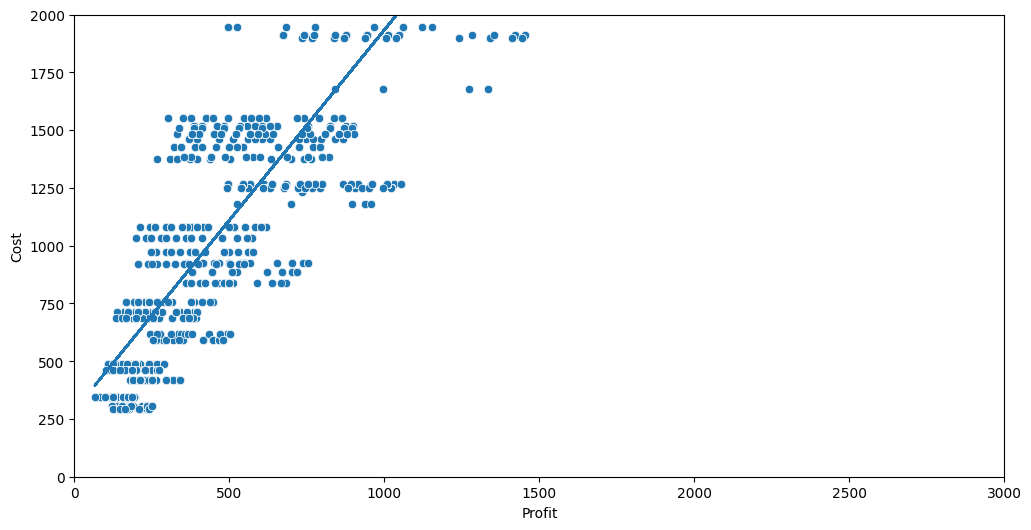

In [52]:
sns.scatterplot(data=sales, x="Profit", y="Cost")
plt.xlim(0,3000)
plt.ylim(0,2000)
plt.gcf().set_size_inches(12,6)

m, b = np.polyfit(sales["Profit"], sales["Cost"], 1)

plt.plot(sales["Profit"], m*sales["Profit"] + b)